In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
# from collections import defaultdict
# import sys; sys.path.append('../')
# from src.data_analysis.tools import ac_pca
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random 
pd.set_option('display.max_columns', 5000)

In [2]:
# combined_data = pd.read_csv('../data/processed/pre_pca.csv')
combined_data = pd.read_csv('../data/processed/local_pairwise_multi_var_scaled.csv')
pd.set_option('display.max_columns', 5000)
# print(combined_data[combined_data['Rural-urban_Continuum Code_2013'] > 2])
# combined_data = combined_data[combined_data['normalized_deaths'] < 0.001]
# print( combined_data[combined_data['normalized_deaths'] > 0.0003].head())
combined_data = combined_data.drop(columns='POP_ESTIMATE_2018')
# combined_data = combined_data[combined_data['Rural-urban_Continuum Code_2013'] > 1]
# combined_data.set_index('FIPS', inplace=True)
data = combined_data.drop(columns=['FIPS1', 'FIPS2', 'Deaths', 'normalized_deaths'])
print(combined_data.shape)
combined_data.head()

(583, 33)


,FIPS1,FIPS2,1 Month Prior Intra-Mobility,1 Month Prior Inter-Mobility,2wk Prior Intra-Mobility,2wk Onset Intra-Mobility,2wk Post Intra-Mobility,2wk Prior Inter-Mobility,2wk Onset Inter-Mobility,2wk Post Inter-Mobility,Density per square mile of land area - Population,Rural-urban_Continuum Code_2013,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Total_age65plus,Total households!!Average household size,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school,NursingCt,HospCt,Hispanic Population,Black Population,Outbreak Month Temp AVG / F,Time from outbreak to intervention,Time from outbreak to national intervention,Time from national intervention to outbreak,Deaths,normalized_deaths
0,1003.0,1097.0,-0.342697,0.204549,1.251452,0.907112,1.251452,2.145553,1.423420,2.145553,0.027059,1.068392,-0.757302,0.647714,-0.794326,0.992035,0.793988,0.059330,-0.649475,-1.226761,0.169463,-0.202892,-0.539651,0.113579,-0.727074,0.237995,-2.055380,-0.057589,-1.367917,-1.050986,1.294704,-33.0,-0.000067
1,12033.0,1003.0,1.072502,0.904665,2.335637,1.674980,2.335637,2.562506,1.785262,2.562506,-0.001238,1.068392,0.126827,0.378963,0.022775,0.859024,0.674572,0.276417,-0.136818,-1.767844,1.053969,0.215399,-1.135186,-0.173696,-1.339735,-0.018766,-1.078738,-0.057589,-0.681604,0.021852,1.294704,-5.0,-0.000007
2,1051.0,1101.0,1.674893,2.880798,3.053564,2.699576,3.053564,5.265570,5.002506,5.265570,0.040786,-0.001836,-0.123036,-0.580859,-0.453867,0.772567,0.004968,0.312598,0.613842,-1.564061,-0.762023,0.621988,-0.412909,-0.670690,-2.046079,0.043495,-2.844225,1.178964,-1.825459,0.021852,2.839259,1.0,0.000059
3,1125.0,1073.0,0.551483,1.107270,-1.651463,-1.604922,-1.651463,-1.794419,-1.643833,-1.794419,0.187570,-2.142291,-0.219137,0.163963,-0.045317,0.220574,0.484115,-0.555751,0.243573,0.239223,0.465290,0.354604,-1.961163,-0.259008,-1.831544,0.099200,0.865778,-1.456517,2.292418,1.094691,-3.101339,19.0,-0.000010
4,1081.0,13215.0,2.049380,3.173286,1.368273,1.296207,1.368273,1.461298,1.808261,1.461298,-0.075388,1.068392,-0.584320,0.609321,-1.066693,0.676135,-0.277584,0.348780,-0.422970,-1.027793,-0.779063,-0.123655,2.247777,-0.130255,-2.633390,-0.272957,-1.870864,-0.170003,0.385994,0.826481,-0.131040,15.0,0.000098


In [3]:
def process_likelihood(data):
    pca = PCA(0.99, whiten=True)
    X = pca.fit_transform(data)
    num_components = X.shape[1]
    X = np.append(X,np.array(combined_data['HospCt']).reshape(-1,1), axis=1)
    X = np.append(X,np.array(combined_data['normalized_deaths']).reshape(-1,1), axis=1)
    columns = ['Principal_Component_' + str(i+1) for i in range(num_components)]
    column_names = ''
    for col in columns:
        column_names += col + '+'
    column_names = column_names[0:len(column_names)-1]
    print(column_names)
    print(columns)
    columns.append("HospCt")
    columns.append('normalized_deaths')
    pre_likelihood_ratio_test = pd.DataFrame(data=X, columns=columns)
    return pre_likelihood_ratio_test

In [4]:
with_hosp = process_likelihood(data)
with_hosp.to_csv('../data/processed/pca_withHosp_local_pairwise_multi_var.csv', index=False)
with_hosp.head()

Principal_Component_1+Principal_Component_2+Principal_Component_3+Principal_Component_4+Principal_Component_5+Principal_Component_6+Principal_Component_7+Principal_Component_8+Principal_Component_9+Principal_Component_10+Principal_Component_11+Principal_Component_12+Principal_Component_13+Principal_Component_14+Principal_Component_15+Principal_Component_16+Principal_Component_17+Principal_Component_18+Principal_Component_19+Principal_Component_20+Principal_Component_21
['Principal_Component_1', 'Principal_Component_2', 'Principal_Component_3', 'Principal_Component_4', 'Principal_Component_5', 'Principal_Component_6', 'Principal_Component_7', 'Principal_Component_8', 'Principal_Component_9', 'Principal_Component_10', 'Principal_Component_11', 'Principal_Component_12', 'Principal_Component_13', 'Principal_Component_14', 'Principal_Component_15', 'Principal_Component_16', 'Principal_Component_17', 'Principal_Component_18', 'Principal_Component_19', 'Principal_Component_20', 'Principal_Com

,Principal_Component_1,Principal_Component_2,Principal_Component_3,Principal_Component_4,Principal_Component_5,Principal_Component_6,Principal_Component_7,Principal_Component_8,Principal_Component_9,Principal_Component_10,Principal_Component_11,Principal_Component_12,Principal_Component_13,Principal_Component_14,Principal_Component_15,Principal_Component_16,Principal_Component_17,Principal_Component_18,Principal_Component_19,Principal_Component_20,Principal_Component_21,HospCt,normalized_deaths
0,1.414724,-0.344904,-1.222979,-0.579958,-0.199700,-0.816140,-0.420532,-0.597557,0.953058,1.027308,-1.741153,-1.010234,-0.155346,-0.289315,-0.103142,-0.958280,-0.273274,0.399117,0.088935,2.628646,-0.190394,-0.727074,-0.000067
1,2.016669,-0.133192,-0.472588,0.347900,-0.344374,-1.534828,-0.692726,-1.531766,0.926407,0.275713,-0.309454,-1.335867,0.329145,-0.940754,-0.742491,-0.370011,-0.064128,0.990389,0.614025,2.489300,-1.121119,-1.339735,-0.000007
2,3.798371,-0.153094,-1.018774,0.021403,-2.798675,-1.221487,-0.528154,-1.472281,0.980412,0.890986,-0.041807,-2.003642,0.628648,0.550482,2.817074,-0.670300,-0.520331,0.310716,-3.165551,1.317946,0.127731,-2.046079,0.000059
3,-1.261859,1.802262,1.029080,1.160048,1.753784,-2.037630,0.144765,0.724355,0.305992,-0.367236,0.580122,1.813538,-0.918673,1.228515,0.806965,-1.974572,-1.785278,0.850681,-0.718742,-2.070368,-0.283104,-1.831544,-0.000010
4,1.508013,1.344040,-0.538603,0.590636,-1.546310,-0.106292,0.868538,0.183002,2.427703,-1.553890,-1.012538,-3.412586,0.981725,0.470347,-0.180499,-0.728004,-1.338350,-0.972981,-1.050001,-0.993646,-0.681472,-2.633390,0.000098


In [5]:
without_hosp = process_likelihood(data.drop(columns=["HospCt"]))
without_hosp.to_csv('../data/processed/pca_withoutHosp_local_pairwise_multi_var.csv', index=False)
without_hosp.head()

Principal_Component_1+Principal_Component_2+Principal_Component_3+Principal_Component_4+Principal_Component_5+Principal_Component_6+Principal_Component_7+Principal_Component_8+Principal_Component_9+Principal_Component_10+Principal_Component_11+Principal_Component_12+Principal_Component_13+Principal_Component_14+Principal_Component_15+Principal_Component_16+Principal_Component_17+Principal_Component_18+Principal_Component_19+Principal_Component_20+Principal_Component_21
['Principal_Component_1', 'Principal_Component_2', 'Principal_Component_3', 'Principal_Component_4', 'Principal_Component_5', 'Principal_Component_6', 'Principal_Component_7', 'Principal_Component_8', 'Principal_Component_9', 'Principal_Component_10', 'Principal_Component_11', 'Principal_Component_12', 'Principal_Component_13', 'Principal_Component_14', 'Principal_Component_15', 'Principal_Component_16', 'Principal_Component_17', 'Principal_Component_18', 'Principal_Component_19', 'Principal_Component_20', 'Principal_Com

,Principal_Component_1,Principal_Component_2,Principal_Component_3,Principal_Component_4,Principal_Component_5,Principal_Component_6,Principal_Component_7,Principal_Component_8,Principal_Component_9,Principal_Component_10,Principal_Component_11,Principal_Component_12,Principal_Component_13,Principal_Component_14,Principal_Component_15,Principal_Component_16,Principal_Component_17,Principal_Component_18,Principal_Component_19,Principal_Component_20,Principal_Component_21,HospCt,normalized_deaths
0,1.406822,0.100723,-1.288018,-0.566429,-0.132983,-0.523506,-0.674291,0.619583,1.362322,-1.431945,-1.413482,-0.152922,-0.259356,-0.061754,-0.838975,-0.263443,0.447651,0.096608,2.606061,0.007587,1.908829,-0.727074,-0.000067
1,1.995326,0.099102,-0.521193,0.367301,-0.227016,-1.058672,-1.465731,1.258647,0.623023,-0.177156,-1.185266,0.344640,-1.244235,-0.745731,-0.138317,-0.058741,1.034237,0.543310,2.512980,-0.908770,-0.063020,-1.339735,-0.000007
2,3.768834,0.008837,-1.063871,0.046684,-2.687413,-0.888496,-1.243177,1.319211,0.845058,0.314401,-2.034014,0.629920,0.260440,2.770820,-0.009702,-0.511750,0.290865,-2.950689,1.131861,0.696665,0.042458,-2.046079,0.000059
3,-1.318822,-1.374637,1.362641,1.171056,1.889156,-1.634624,0.246546,-0.491261,0.318936,0.258140,1.947339,-0.930788,1.222136,0.809901,-1.176238,-1.761990,1.007057,-0.371884,-2.170149,0.057689,0.015259,-1.831544,-0.000010
4,1.448569,-1.281532,-0.272282,0.609843,-1.468633,-0.010113,1.861562,2.068420,-0.391759,-1.028187,-2.666622,0.999995,-0.599466,-0.306425,0.398470,-1.325859,-0.854912,-0.667783,-1.114961,-0.176428,-0.600003,-2.633390,0.000098


0.0023908446551592633
[-9.25006746e-06]
-1.06723178485152e-05


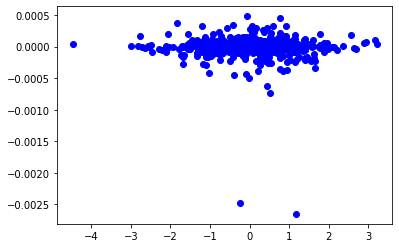

In [6]:
# combined_data = combined_data[combined_data['normalized_deaths'] < 0.0003]
X = np.array(combined_data['1 Month Prior Inter-Mobility']).reshape(-1,1)
Y = combined_data['normalized_deaths']
reg = lm.LinearRegression().fit(X,Y)
print(reg.score(X,Y))
print(reg.coef_)
print(reg.intercept_)
plt.plot(X,Y, 'bo')

In [7]:
print(data.shape)
data.head()

(583, 29)


,1 Month Prior Intra-Mobility,1 Month Prior Inter-Mobility,2wk Prior Intra-Mobility,2wk Onset Intra-Mobility,2wk Post Intra-Mobility,2wk Prior Inter-Mobility,2wk Onset Inter-Mobility,2wk Post Inter-Mobility,Density per square mile of land area - Population,Rural-urban_Continuum Code_2013,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Total_age65plus,Total households!!Average household size,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school,NursingCt,HospCt,Hispanic Population,Black Population,Outbreak Month Temp AVG / F,Time from outbreak to intervention,Time from outbreak to national intervention,Time from national intervention to outbreak
0,-0.342697,0.204549,1.251452,0.907112,1.251452,2.145553,1.423420,2.145553,0.027059,1.068392,-0.757302,0.647714,-0.794326,0.992035,0.793988,0.059330,-0.649475,-1.226761,0.169463,-0.202892,-0.539651,0.113579,-0.727074,0.237995,-2.055380,-0.057589,-1.367917,-1.050986,1.294704
1,1.072502,0.904665,2.335637,1.674980,2.335637,2.562506,1.785262,2.562506,-0.001238,1.068392,0.126827,0.378963,0.022775,0.859024,0.674572,0.276417,-0.136818,-1.767844,1.053969,0.215399,-1.135186,-0.173696,-1.339735,-0.018766,-1.078738,-0.057589,-0.681604,0.021852,1.294704
2,1.674893,2.880798,3.053564,2.699576,3.053564,5.265570,5.002506,5.265570,0.040786,-0.001836,-0.123036,-0.580859,-0.453867,0.772567,0.004968,0.312598,0.613842,-1.564061,-0.762023,0.621988,-0.412909,-0.670690,-2.046079,0.043495,-2.844225,1.178964,-1.825459,0.021852,2.839259
3,0.551483,1.107270,-1.651463,-1.604922,-1.651463,-1.794419,-1.643833,-1.794419,0.187570,-2.142291,-0.219137,0.163963,-0.045317,0.220574,0.484115,-0.555751,0.243573,0.239223,0.465290,0.354604,-1.961163,-0.259008,-1.831544,0.099200,0.865778,-1.456517,2.292418,1.094691,-3.101339
4,2.049380,3.173286,1.368273,1.296207,1.368273,1.461298,1.808261,1.461298,-0.075388,1.068392,-0.584320,0.609321,-1.066693,0.676135,-0.277584,0.348780,-0.422970,-1.027793,-0.779063,-0.123655,2.247777,-0.130255,-2.633390,-0.272957,-1.870864,-0.170003,0.385994,0.826481,-0.131040


In [8]:
def run_pca(variance, whitening):
    pca = PCA(variance, whiten=whitening)
    X = pca.fit_transform(data)
    # print(X.shape)
    # print(pca.components_.shape)
    num_pc = pca.components_.shape[0]
    # print(num_pc)
    Y = combined_data['normalized_deaths']
    reg = lm.LinearRegression().fit(X,Y)
    final_score = reg.score(X,Y)
    print("Regression score: ", final_score)
    cols = data.columns
    # print(cols)
    coefs = {col : 0 for col in cols}
    for i in range(num_pc): 
        for j in range(len(cols)): 
            col = cols[j]
            coefs[col] += (reg.coef_[i] * pca.components_[i,j])
    sorted_coefs = {k:v for k,v in sorted(coefs.items(), key=lambda x: abs(x[1]), reverse=True)}
    for var, weight in sorted_coefs.items():
        print('\t{0:<100} {1:>0.4f}'.format(var, weight))
    coefs_values =np.array(list(coefs.values())) 
    variables = np.array(list(coefs.keys()))
    df_coef = pd.DataFrame({'Variable': variables, 'Coefficient': coefs_values})
    df_coef = df_coef.append({"Variable": "Score", "Coefficient": final_score}, ignore_index=True)
    df_coef = df_coef.append({"Variable": "Variance", "Coefficient": variance}, ignore_index=True)
    df_coef = df_coef.append({"Variable": "whitening", "Coefficient": whitening}, ignore_index=True)
    return df_coef

In [9]:
def run_pca2(variance=None, whitening=False,n_components=None):
    if variance is not None:
        pca = PCA(variance, whiten=whitening)
    elif n_components is not None:
         pca = PCA(n_components=n_components, whiten=whitening)
    else: 
        return None
    X = pca.fit_transform(data)
    print(X.shape)
    # print(pca.components_.shape)
    num_pc = pca.components_.shape[0]
    # print(num_pc)
    Y = combined_data['normalized_deaths']
    reg = lm.LinearRegression().fit(X,Y)
#     print(len(reg.coef_))
#     print(reg.coef_)
    final_score = reg.score(X,Y)
    print("Regression score: ", final_score)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    test_reg = lm.LinearRegression().fit(X_train,y_train)
    test_score = test_reg.score(X_test,y_test)
    print("Test Regression score: ", test_score)
    
    model = (X @ reg.coef_ ).reshape(-1,1)
    print(model.shape)
    cols = data.columns
    for col in cols: 
        model_reg = lm.LinearRegression().fit(model,data[col])
        print("Regression with PCs and:", col)
        print("\t\t score:", model_reg.score(model,data[col]))
        print("\t\t coeff", model_reg.coef_)
        print("\t\t intercept", model_reg.intercept_)
        print("\t\t ")
    
    # print(cols)
#     coefs = {col : 0 for col in cols}
    columns=['PC', 'PC correlation with deaths', 'regression coefficient in single PC model', 'regression coefficient in full model']
    for col in cols:
        columns.append('PC correlation with' + col)
        columns.append('Regression coefficient with' + col)
        columns.append('PC loading for' + col)
    df = pd.DataFrame(columns=columns)
    for i in range(num_pc): 
        row={}
        print("\t PC", str(i) + ":" )
        pc = X[:,i].reshape(X.shape[0], 1)
        reg_pc_deaths = lm.LinearRegression().fit(pc, Y)
        print("\t\t PC correlation with deaths:", reg_pc_deaths.score(pc, Y))
        print("\t\t regression coefficient in single PC model:", reg_pc_deaths.coef_)
        print("\t\t regression coefficient in full model:", reg.coef_[i])
        print("\t\t bias in single PC model:", reg_pc_deaths.intercept_)
        print("\t\t bias in full model:", reg.intercept_)
        row['PC'] = i
        row['PC correlation with deaths'] = reg_pc_deaths.score(pc, Y)
        row['regression coefficient in single PC model'] = reg_pc_deaths.coef_[0]
        row['regression coefficient in full model'] = reg.coef_[i]
        plt.plot(X[:,i], Y, 'bo')
        plt.xlabel("Principal Component" + str(i))
        plt.ylabel("Deaths")
        plt.show()
        sig_cols = []
        for j in range(len(cols)):
            col = cols[j]
            reg_pc_col = lm.LinearRegression().fit(pc, data[col])
#             print("\t\t\t\t PC correlation with", col, ":", reg_pc_col.score(pc, data[col]))
#             print("\t\t\t\t regression coefficient:", reg_pc_deaths.coef_[0])
            correlation = reg_pc_col.score(pc, data[col])
            if correlation >= 0.1:
                sig_cols.append(col)
            row['PC correlation with' + col] = correlation
            row['Regression coefficient with' + col] = reg_pc_col.coef_[0]
            row['PC loading for' + col] = pca.components_[i,j]
        df = df.append(row, ignore_index=True)
        fig = plt.figure(figsize=(40,160))
        print("Significant variables in PC")
        for col in sig_cols:
            print('\t\t' + col, row['Regression coefficient with' + col]) 
        for j in range(len(cols)):
            col = cols[j]
            plt.subplot(len(cols)/2 + 1, 2, j+1)
            plt.plot(X[:,i], data[col], 'bo')
            plt.xlabel("Principal Component" + str(i))
            plt.ylabel(col)
        plt.show()
    df.set_index('PC', inplace=True)
    coef_df = pd.DataFrame(index=data.columns, columns=['Coefficient in model'])
    for var in coef_df.index:
        var_coef = 0
        for pc in df.index:
            var_coef += df.loc[pc,'regression coefficient in full model'] * df.loc[pc,'PC loading for' + var]
        coef_df.loc[var,'Coefficient in model'] = var_coef
#     print(df.head(num_pc))
    return df, coef_df

[2.81635281e-01 1.39036084e-01 1.33050197e-01 8.36490880e-02
 4.94623169e-02 3.93557346e-02 3.43080060e-02 3.03162863e-02
 2.78924043e-02 2.47301203e-02 2.36645110e-02 2.26759812e-02
 1.90290624e-02 1.76389405e-02 1.40107340e-02 1.07541014e-02
 9.99930438e-03 8.34273551e-03 7.54921638e-03 6.94017788e-03
 6.07377567e-03 4.32584574e-03 2.46593738e-03 1.85885502e-03
 6.94852445e-04 4.88141156e-04 5.23094208e-05 5.55427657e-32
 2.34375680e-33] 


1 0.4206713653287657
2 0.5537215621165965
3 0.6373706500894776
4 0.6868329670040425
5 0.7261887015923223
6 0.7604967076317003
7 0.7908129939560249
8 0.8187053983009016
9 0.8434355186036501
10 0.8671000295542043
11 0.8897760107118734
12 0.9088050730919398
13 0.9264440135809646
14 0.9404547475765115
15 0.9512088490169823
16 0.9612081534000744
17 0.9695508889099491
18 0.9771001052878427
19 0.984040283170524
20 0.9901140588355691
21 0.9944399045796226
22 0.9969058419608137
23 0.9987646969786864
24 0.9994595494235835
25 0.9999476905792254
26 1.0
27 1.0

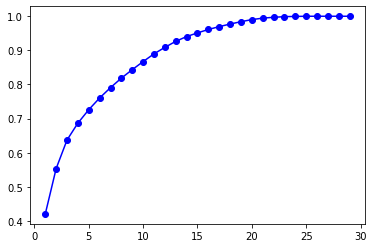

In [10]:
# total_components = len(data.columns)
pca = PCA()
pca.fit(data)
var_explained = np.array(pca.explained_variance_ratio_)
print(var_explained, '\n\n')
components = []
variances = []
for i in range(len(var_explained)): 
    n_components = i + 1
    components.append(n_components)
    variances.append(np.sum(var_explained[:n_components+1]))
    print(n_components, variances[i])

plt.plot(components, variances, 'bo-')

In [11]:
def run_pca3(data_matrix, add_hosp=False, variance=None, whitening=False,n_components=None):
    random_states =np.random.randint(0,1000, size=300)
    if variance is not None:
        pca = PCA(variance, whiten=whitening)
    elif n_components is not None:
         pca = PCA(n_components=n_components, whiten=whitening)
    else: 
        return None
#     pca = PCA(0.999)
    X=pca.fit_transform(data_matrix)
    print(X.shape)
    Y = combined_data['normalized_deaths']
    print(Y.shape)
    reg = lm.LinearRegression().fit(X,Y)
    final_score = reg.score(X,Y)
    print("Regression score: ", final_score)
    cv_results = []
    for rs in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=rs)
        test_reg = lm.LinearRegression().fit(X_train,y_train)
        test_score = test_reg.score(X_test,y_test)
        cv_results.append(test_score)
#     print("Test Regression score: ", test_score)
#     linearReg = lm.LinearRegression()
#     cv_results = cross_val_score(linearReg, X, Y, cv=3)
#     print(cv_results)
    CV_score = np.mean(np.array(cv_results))
    print("CV Regression score: ", CV_score)
#     print("coefficients: ", reg.coef_)
    if add_hosp:
        print("\n\nAfter adding HospCt")
        X = np.append(X,np.array(combined_data['HospCt']).reshape(-1,1), axis=1)
        print(X.shape)
        Y = combined_data['normalized_deaths']
        print(Y.shape)
        reg = lm.LinearRegression().fit(X,Y)
        final_score = reg.score(X,Y)
        print("Regression score: ", final_score)
        cv_results = []
        for rs in random_states:
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=rs)
            test_reg = lm.LinearRegression().fit(X_train,y_train)
            test_score = test_reg.score(X_test,y_test)
            cv_results.append(test_score)
        CV_score = np.mean(np.array(cv_results))
        print("CV Regression score: ", CV_score)
#         print("coefficients: ", reg.coef_)

In [12]:
def run_pca4(data_matrix, add_hosp=False, variance=None, whitening=False,n_components=None,exp=2):
    if variance is not None:
        pca = PCA(variance, whiten=whitening)
    elif n_components is not None:
         pca = PCA(n_components=n_components, whiten=whitening)
    else: 
        return None
#     pca = PCA(0.999)
    X=pca.fit_transform(data_matrix)
    X = np.power(X, exp)
    print(X.shape)
    Y = combined_data['normalized_deaths']
    print(Y.shape)
    reg = lm.LinearRegression().fit(X,Y)
    final_score = reg.score(X,Y)
    print("Regression score: ", final_score)
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    linearReg = lm.LinearRegression()
    cv_results = cross_val_score(linearReg, X, Y, cv=10)
    test_score = np.mean(np.array(cv_results))
    print("Test Regression score: ", test_score)
#     print("coefficients: ", reg.coef_)
    if add_hosp:
        print("\n\nAfter adding HospCt")
        X = np.append(X,np.array(combined_data['HospCt']).reshape(-1,1), axis=1)
        print(X.shape)
        Y = combined_data['normalized_deaths']
        print(Y.shape)
        reg = lm.LinearRegression().fit(X,Y)
        final_score = reg.score(X,Y)
        print("Regression score: ", final_score)
#         X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
#         test_reg = lm.LinearRegression().fit(X_train,y_train)
#         test_score = test_reg.score(X_test,y_test)
        linearReg = lm.LinearRegression()
        cv_results = cross_val_score(linearReg, X, Y, cv=10)
        test_score = np.mean(np.array(cv_results))
        print("Test Regression score: ", test_score)
#         print("coefficients: ", reg.coef_)

In [13]:
print("With HospCt:")
run_pca3(data,variance=0.99)
print("\n\nWithout HospCt")
run_pca3(data.drop(columns=['HospCt']),add_hosp=True, variance=0.99)

With HospCt:
(583, 21)
(583,)
Regression score:  0.6182500765687053
CV Regression score:  0.14274589465002932


Without HospCt
(583, 21)
(583,)
Regression score:  0.6192954377845745
CV Regression score:  0.13351724475852908


After adding HospCt
(583, 22)
(583,)
Regression score:  0.6234622068642787
CV Regression score:  0.21992625326235024


In [14]:
print("With HospCt:")
run_pca3(data,n_components=10)
print("\n\nWithout HospCt")
run_pca3(data.drop(columns=['HospCt']),add_hosp=True,n_components=16)

With HospCt:
(583, 10)
(583,)
Regression score:  0.37339763791927516
CV Regression score:  -0.1422708073040145


Without HospCt
(583, 16)
(583,)
Regression score:  0.5665729508267248
CV Regression score:  0.10376365133845665


After adding HospCt
(583, 17)
(583,)
Regression score:  0.573469789230554
CV Regression score:  0.1389979753199245


In [15]:
print("With HospCt:")
run_pca3(data,variance=0.85)
print("\n\nWithout HospCt")
run_pca3(data.drop(columns=['HospCt']),add_hosp=True,n_components=7)

With HospCt:
(583, 11)
(583,)
Regression score:  0.4821414886938809
CV Regression score:  -0.05181335130031873


Without HospCt
(583, 7)
(583,)
Regression score:  0.2903142862737338
CV Regression score:  -0.22763823633145294


After adding HospCt
(583, 8)
(583,)
Regression score:  0.30330534514532137
CV Regression score:  -0.1586176379274192
